# Clustering water quality

#### Présentation de la base de données

Ma base de données représente des indicateurs de la qualité de l’eau. Cette database récupérée sur 
Kaggle (Water quality (kaggle.com)) décris la quantité de différentes composantes chimiques
contenues dans des échantillons d’eau prélevés en milieu urbain. Il s’agit d’un support créé de toutes
pièces à des fins éducatives et non de prélèvement réel. Ainsi, elle comporte 7999 observations et 21 
variables, dont une binaire (« is_safe ») qui détermine si l’observation est sécurisée ou non, soit si la 
qualité de l’eau prélevée est conforme au critère indiqué ci-après. 

## importation de la base de données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

data_file = "C:/Users/maserati/Documents/IA M1/Rapport 1/waterQuality1.csv"
data = pd.read_csv(data_file)
data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [2]:
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


## Statistique descriptive

In [3]:
data.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


## visualisation de la colonne is_safe

In [4]:
indice =20
gt = data.iloc[:,indice]
print(gt)

0       1
1       1
2       0
3       1
4       1
       ..
7994    1
7995    1
7996    1
7997    1
7998    1
Name: is_safe, Length: 7999, dtype: object


## Supression de la colonne is_safe

In [5]:
import pandas as pd
data_clean = data.drop('is_safe',axis=1)
data_clean

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,0.000,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,0.000,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,0.000,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


## Vérification des valeurs manquante

In [6]:
data_clean.isna().sum() 

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
dtype: int64

## Vérification de la taille des bases pour vérifier la bonne suppression de la colonne is_safe

In [7]:
print(data.shape)

(7999, 21)


In [8]:
print(data_clean.shape)

(7999, 20)


## Vérification du types des variables 

In [9]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

## Numérisation de la variable "ammonia"

In [10]:
data_clean['ammonia'] = pd.to_numeric(data_clean['ammonia'], errors='coerce', downcast='float')

In [11]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7996 non-null   float32
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [12]:
data_clean.info

<bound method DataFrame.info of       aluminium    ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65   9.080000     0.04    2.85    0.007        0.35      0.83   
1          2.32  21.160000     0.01    3.31    0.002        5.28      0.68   
2          1.01  14.020000     0.04    0.58    0.008        4.24      0.53   
3          1.36  11.330000     0.04    2.96    0.001        7.23      0.03   
4          0.92  24.330000     0.03    0.20    0.006        2.67      0.69   
...         ...        ...      ...     ...      ...         ...       ...   
7994       0.05   7.780000     0.00    1.95    0.040        0.10      0.03   
7995       0.05  24.219999     0.02    0.59    0.010        0.45      0.02   
7996       0.09   6.850000     0.00    0.61    0.030        0.05      0.05   
7997       0.01  10.000000     0.01    2.00    0.000        2.00      0.00   
7998       0.04   6.850000     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteri

## Vérification des valeurs non available 

In [13]:
import numpy as np

has_nan = np.isnan(data_clean).any()
has_inf = np.isinf(data_clean).any()

print(f"Contient des NaN : {has_nan}")
print(f"Contient des infinis : {has_inf}")


Contient des NaN : aluminium      False
ammonia         True
arsenic        False
barium         False
cadmium        False
chloramine     False
chromium       False
copper         False
flouride       False
bacteria       False
viruses        False
lead           False
nitrates       False
nitrites       False
mercury        False
perchlorate    False
radium         False
selenium       False
silver         False
uranium        False
dtype: bool
Contient des infinis : aluminium      False
ammonia        False
arsenic        False
barium         False
cadmium        False
chloramine     False
chromium       False
copper         False
flouride       False
bacteria       False
viruses        False
lead           False
nitrates       False
nitrites       False
mercury        False
perchlorate    False
radium         False
selenium       False
silver         False
uranium        False
dtype: bool


### Suppression des valeurs manquantes

In [65]:
data_finish = data_clean.dropna()
data_finish

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.080000,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.160000,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.020000,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,11.330000,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,24.330000,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.780000,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,0.000,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03
7995,0.05,24.219999,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,0.000,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08
7996,0.09,6.850000,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,0.000,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05
7997,0.01,10.000000,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


### Vérification

In [15]:
has_nan = np.isnan(data_finish).any()
has_inf = np.isinf(data_finish).any()

print(f"Contient des NaN : {has_nan}")
print(f"Contient des infinis : {has_inf}")

Contient des NaN : aluminium      False
ammonia        False
arsenic        False
barium         False
cadmium        False
chloramine     False
chromium       False
copper         False
flouride       False
bacteria       False
viruses        False
lead           False
nitrates       False
nitrites       False
mercury        False
perchlorate    False
radium         False
selenium       False
silver         False
uranium        False
dtype: bool
Contient des infinis : aluminium      False
ammonia        False
arsenic        False
barium         False
cadmium        False
chloramine     False
chromium       False
copper         False
flouride       False
bacteria       False
viruses        False
lead           False
nitrates       False
nitrites       False
mercury        False
perchlorate    False
radium         False
selenium       False
silver         False
uranium        False
dtype: bool


In [16]:
print(data_finish.columns)

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium'],
      dtype='object')


## Standardisation des données

Avec ce type de base de données la standardisation n'est pas nécessaire, en effet il y a peu d'écart d'échelle entre les variables

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_standard = scaler.fit_transform(data_finish)
print(data_standard)

[[ 0.77740287 -0.58549134 -0.48087476 ...  1.05369443  1.33873624
  -0.91704015]
 [ 1.30694501  0.775118   -0.59963176 ...  1.05369443  0.85113427
   0.19802266]
 [ 0.27157158 -0.02908315 -0.48087476 ...  0.70612871  2.03531047
  -1.28872776]
 ...
 [-0.45556091 -0.83666344 -0.63921743 ... -1.72683135 -0.75098648
   0.19802266]
 [-0.51878982 -0.48186877 -0.59963176 ... -1.72683135 -1.02961617
  -1.66041536]
 [-0.49507898 -0.83666344 -0.59963176 ... -1.72683135 -0.75098648
   0.19802266]]


## Test linkage 

In [40]:
pip install pillow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Test 1

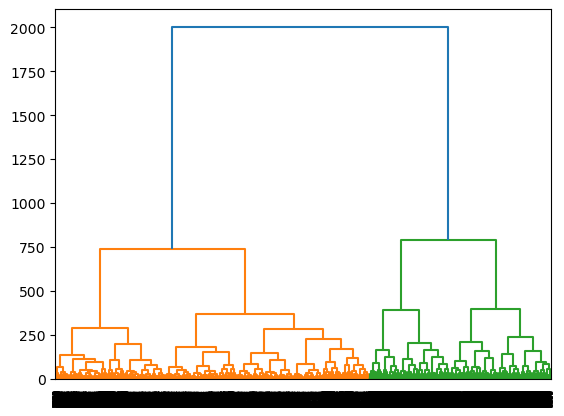

<Figure size 640x480 with 0 Axes>

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from PIL import Image, ImageDraw


linkage_matrix = linkage(data_finish, method ='ward', metric='euclidean')
den = dendrogram(linkage_matrix)

plt.show()

plt.savefig("dendrogram.jpg")


In [19]:
linkage_matrix.shape


(7995, 4)

In [20]:
help(cophenet)

Help on function cophenet in module scipy.cluster.hierarchy:

cophenet(Z, Y=None)
    Calculate the cophenetic distances between each observation in
    the hierarchical clustering defined by the linkage ``Z``.
    
    Suppose ``p`` and ``q`` are original observations in
    disjoint clusters ``s`` and ``t``, respectively and
    ``s`` and ``t`` are joined by a direct parent cluster
    ``u``. The cophenetic distance between observations
    ``i`` and ``j`` is simply the distance between
    clusters ``s`` and ``t``.
    
    Parameters
    ----------
    Z : ndarray
        The hierarchical clustering encoded as an array
        (see `linkage` function).
    Y : ndarray (optional)
        Calculates the cophenetic correlation coefficient ``c`` of a
        hierarchical clustering defined by the linkage matrix `Z`
        of a set of :math:`n` observations in :math:`m`
        dimensions. `Y` is the condensed distance matrix from which
        `Z` was generated.
    
    Returns
    -

## Coefficient Cophenetique

In [21]:
from scipy.cluster.hierarchy import single, cophenet
from scipy.spatial.distance import pdist, squareform
coph_dists = cophenet(linkage_matrix,pdist(data_finish, metric = 'euclidean'))
c = coph_dists[0]
print(c)

0.7486804409009871


## R

In [22]:
from scipy.cluster.hierarchy import inconsistent
inc = inconsistent(linkage_matrix)[:,3]
inc.mean()

0.5442381227968023

## test des linkage 

In [23]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
import matplotlib.pyplot as plt


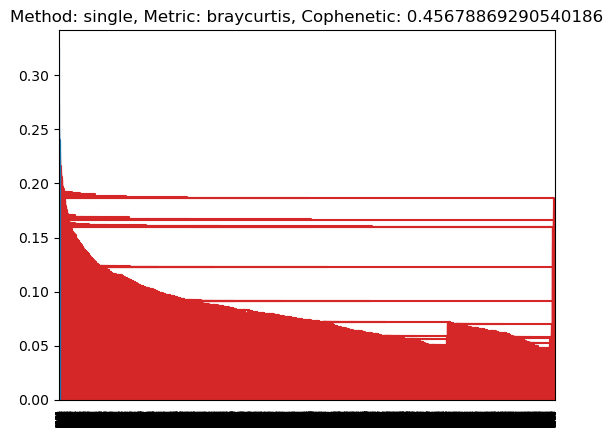

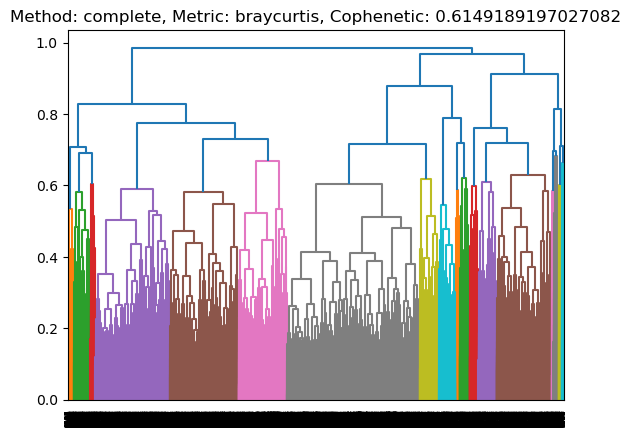

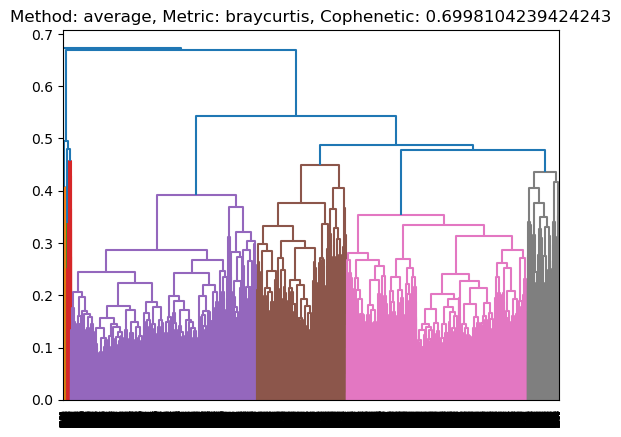

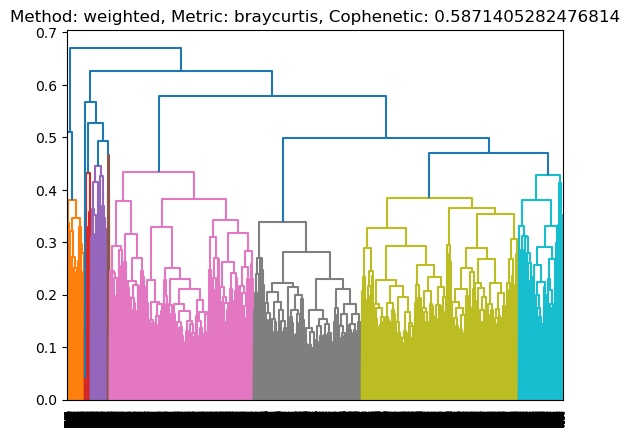

Erreur pour Method: centroid, Metric: braycurtis - Method 'centroid' requires the distance metric to be Euclidean
Erreur pour Method: median, Metric: braycurtis - Method 'median' requires the distance metric to be Euclidean
Erreur pour Method: ward, Metric: braycurtis - Method 'ward' requires the distance metric to be Euclidean


In [18]:
metric_ex = ['braycurtis']
method_ex = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']


for random_metric_ex in metric_ex:
    for random_method_ex in method_ex:
        try:
         
            linkage_matrix = linkage(data_finish, method=random_method_ex, metric=random_metric_ex)

            coph_dists = cophenet(linkage_matrix, pdist(data_finish, metric =random_metric_ex))
            c=coph_dists[0]

            
            plt.figure()
            dendrogram(linkage_matrix)
            plt.title('Method: ' + random_method_ex + ', Metric: ' + random_metric_ex + ', Cophenetic: ' + str(c))
            plt.show()

        except Exception as e:
            print(f"Erreur pour Method: {random_method_ex}, Metric: {random_metric_ex} - {e}")


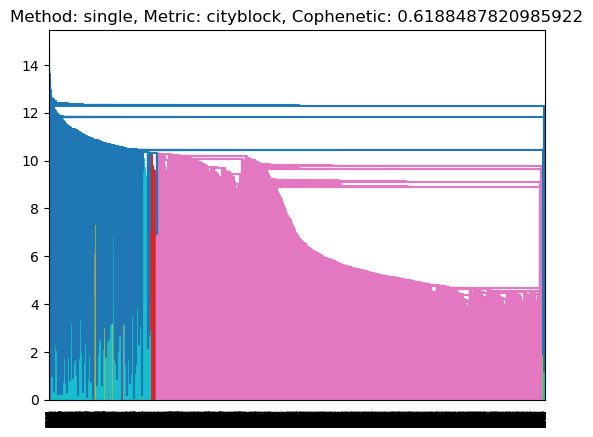

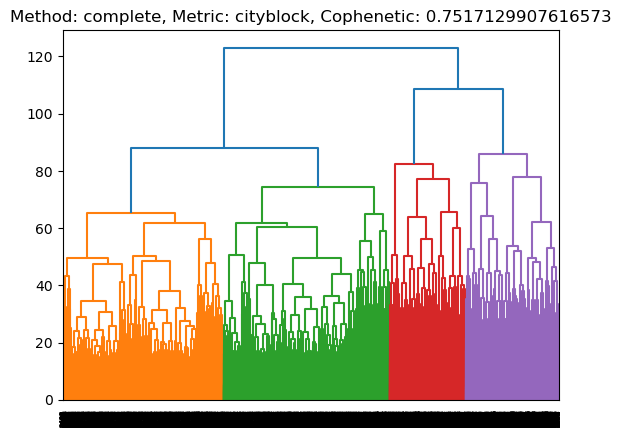

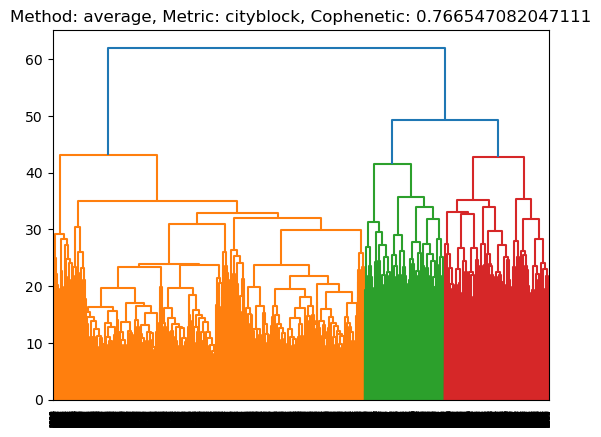

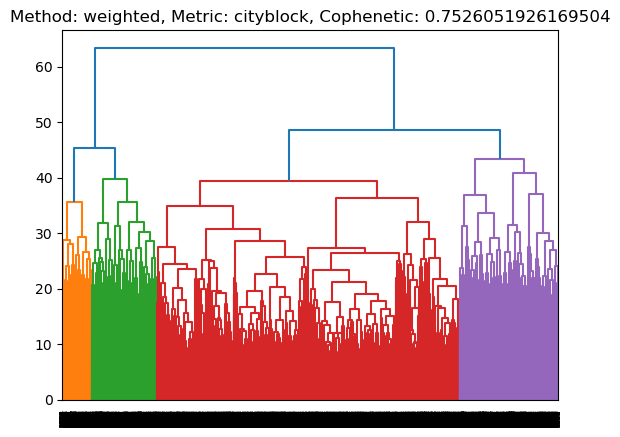

Erreur pour Method: centroid, Metric: cityblock - Method 'centroid' requires the distance metric to be Euclidean
Erreur pour Method: median, Metric: cityblock - Method 'median' requires the distance metric to be Euclidean
Erreur pour Method: ward, Metric: cityblock - Method 'ward' requires the distance metric to be Euclidean


In [15]:
metric_ex = ['cityblock']
method_ex = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']


for random_metric_ex in metric_ex:
    for random_method_ex in method_ex:
        try:
         
            linkage_matrix = linkage(data_finish, method=random_method_ex, metric=random_metric_ex)

            coph_dists = cophenet(linkage_matrix, pdist(data_finish, metric =random_metric_ex))
            c=coph_dists[0]

            
            plt.figure()
            dendrogram(linkage_matrix)
            plt.title('Method: ' + random_method_ex + ', Metric: ' + random_metric_ex + ', Cophenetic: ' + str(c))
            plt.show()

        except Exception as e:
            print(f"Erreur pour Method: {random_method_ex}, Metric: {random_metric_ex} - {e}")

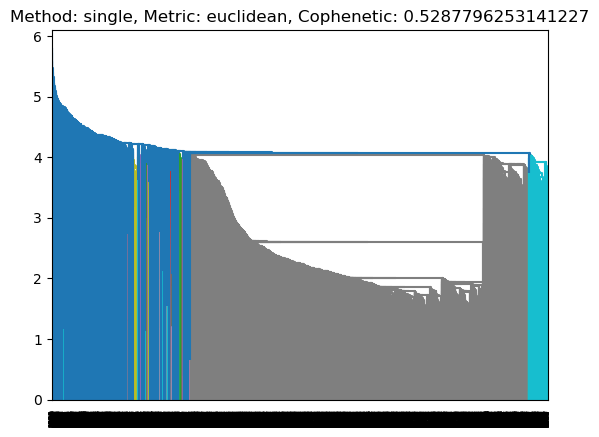

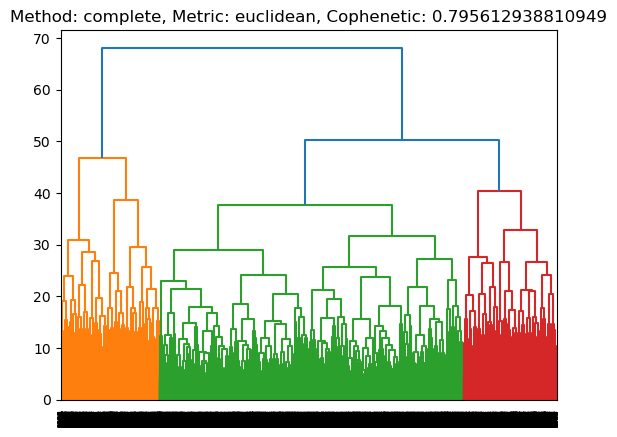

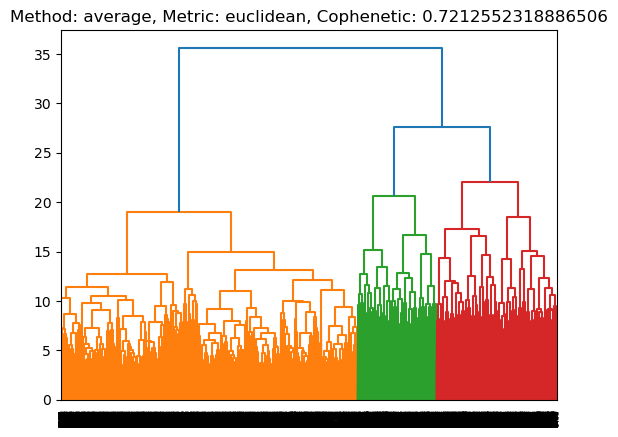

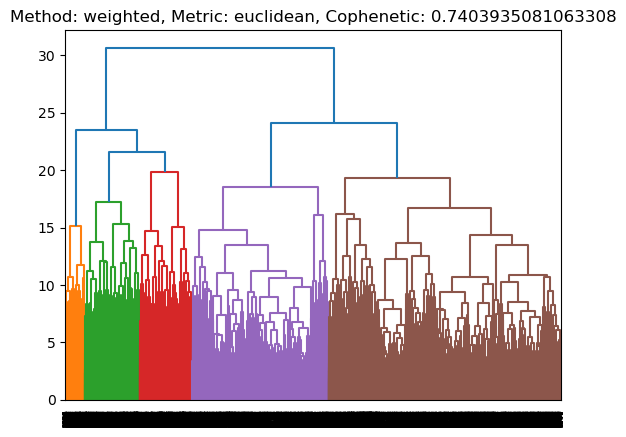

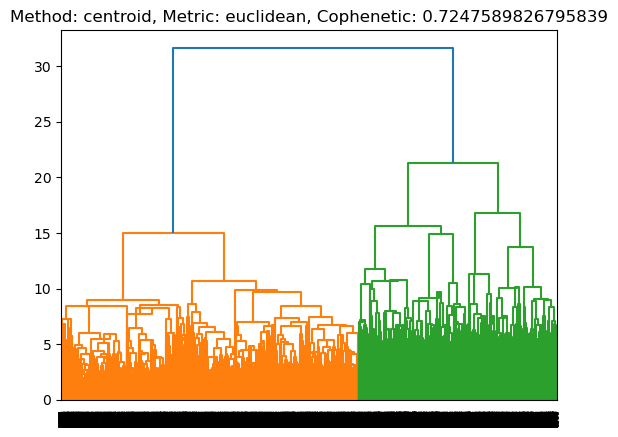

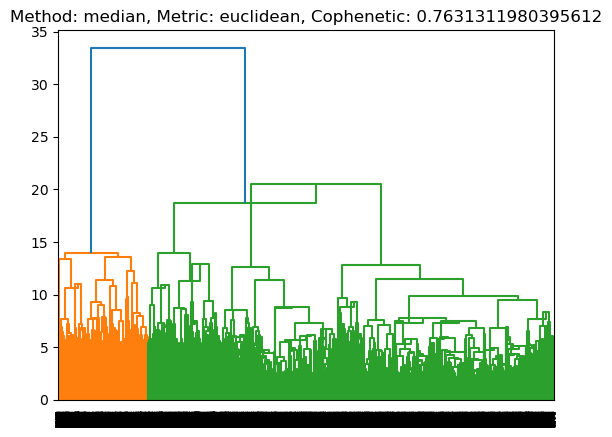

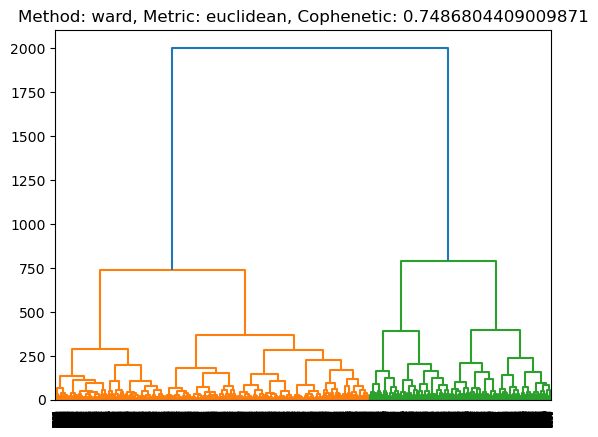

In [15]:
metric_ex = ['euclidean']
method_ex = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']


for random_metric_ex in metric_ex:
    for random_method_ex in method_ex:
        try:
         
            linkage_matrix = linkage(data_finish, method=random_method_ex, metric=random_metric_ex)

            coph_dists = cophenet(linkage_matrix, pdist(data_finish, metric =random_metric_ex))
            c=coph_dists[0]

            
            plt.figure()
            dendrogram(linkage_matrix)
            plt.title('Method: ' + random_method_ex + ', Metric: ' + random_metric_ex + ', Cophenetic: ' + str(c))
            plt.show()

        except Exception as e:
            print(f"Erreur pour Method: {random_method_ex}, Metric: {random_metric_ex} - {e}")

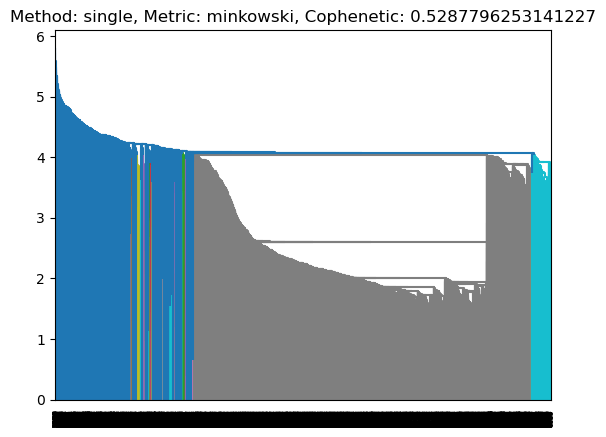

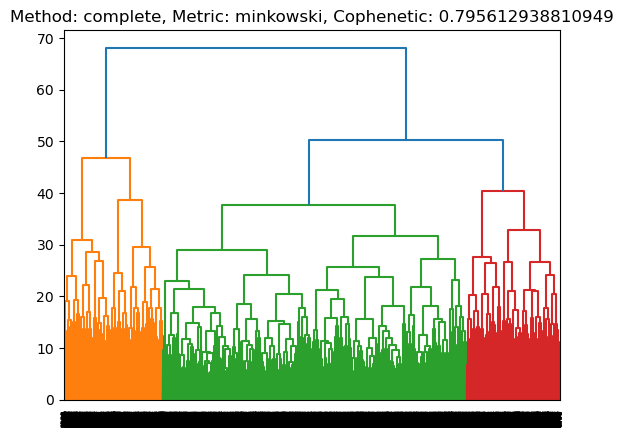

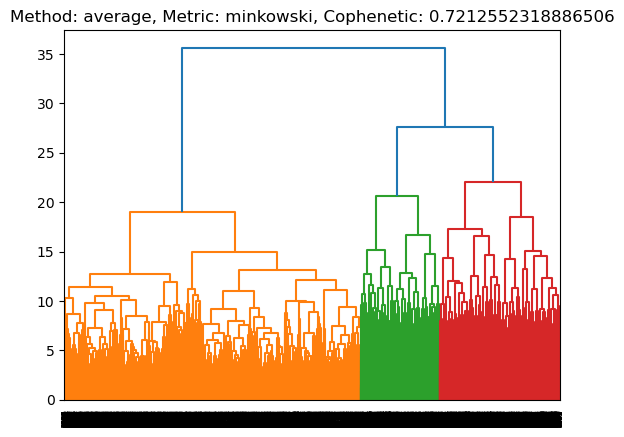

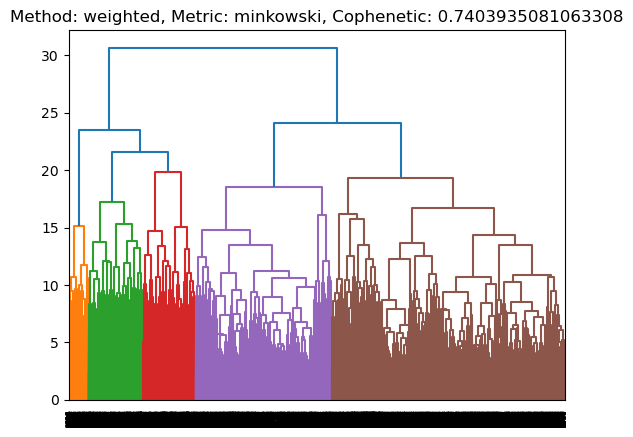

Erreur pour Method: centroid, Metric: minkowski - Method 'centroid' requires the distance metric to be Euclidean
Erreur pour Method: median, Metric: minkowski - Method 'median' requires the distance metric to be Euclidean
Erreur pour Method: ward, Metric: minkowski - Method 'ward' requires the distance metric to be Euclidean


In [17]:
metric_ex = ['minkowski']
method_ex = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']


for random_metric_ex in metric_ex:
    for random_method_ex in method_ex:
        try:
         
            linkage_matrix = linkage(data_finish, method=random_method_ex, metric=random_metric_ex)

            coph_dists = cophenet(linkage_matrix, pdist(data_finish, metric =random_metric_ex))
            c=coph_dists[0]

            
            plt.figure()
            dendrogram(linkage_matrix)
            plt.title('Method: ' + random_method_ex + ', Metric: ' + random_metric_ex + ', Cophenetic: ' + str(c))
            plt.show()

        except Exception as e:
            print(f"Erreur pour Method: {random_method_ex}, Metric: {random_metric_ex} - {e}")

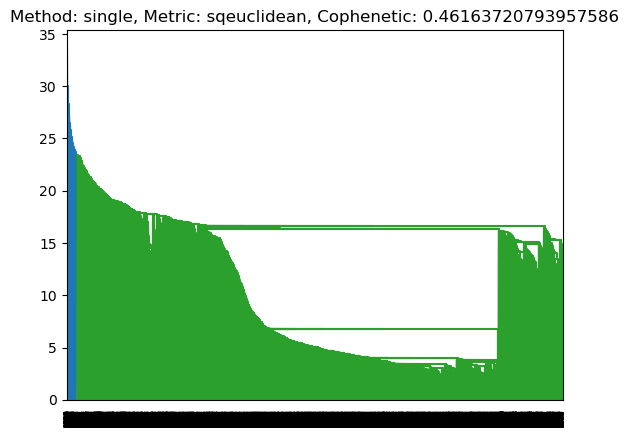

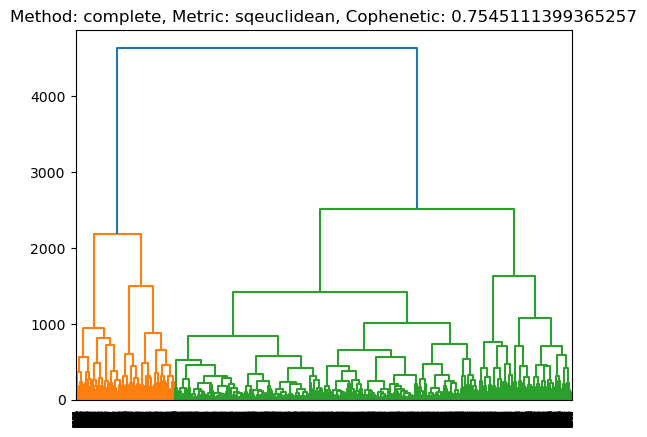

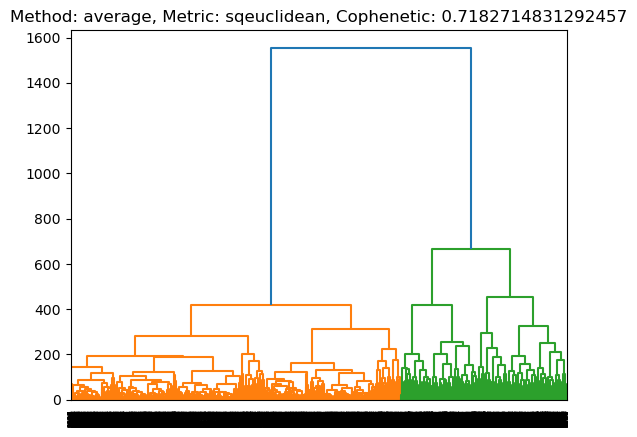

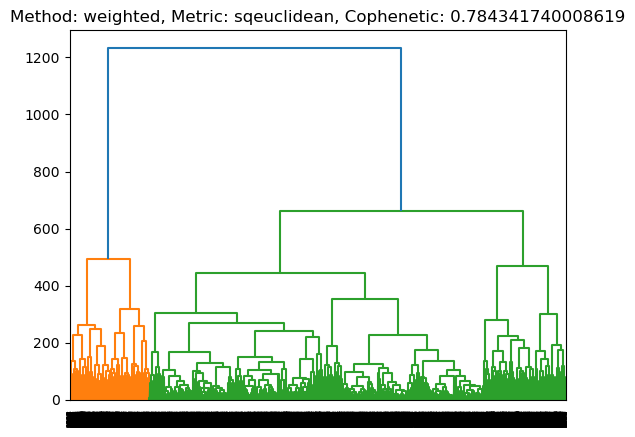

Erreur pour Method: centroid, Metric: sqeuclidean - Method 'centroid' requires the distance metric to be Euclidean
Erreur pour Method: median, Metric: sqeuclidean - Method 'median' requires the distance metric to be Euclidean
Erreur pour Method: ward, Metric: sqeuclidean - Method 'ward' requires the distance metric to be Euclidean


In [15]:
metric_ex = ['sqeuclidean']
method_ex = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']


for random_metric_ex in metric_ex:
    for random_method_ex in method_ex:
        try:
         
            linkage_matrix = linkage(data_finish, method=random_method_ex, metric=random_metric_ex)

            coph_dists = cophenet(linkage_matrix, pdist(data_finish, metric =random_metric_ex))
            c=coph_dists[0]

            
            plt.figure()
            dendrogram(linkage_matrix)
            plt.title('Method: ' + random_method_ex + ', Metric: ' + random_metric_ex + ', Cophenetic: ' + str(c))
            plt.show()

        except Exception as e:
            print(f"Erreur pour Method: {random_method_ex}, Metric: {random_metric_ex} - {e}")

## Mon meilleur linkage 

Mon meilleur Cophenetic Correlation Coefficient a été obtenu avec la methode : Complete et la distance metric : euclidean, selon les methodes et metric que j'ai testé. 

In [24]:
from scipy.cluster.hierarchy import single, cophenet
from scipy.cluster.hierarchy import inconsistent
import matplotlib.pyplot as plt

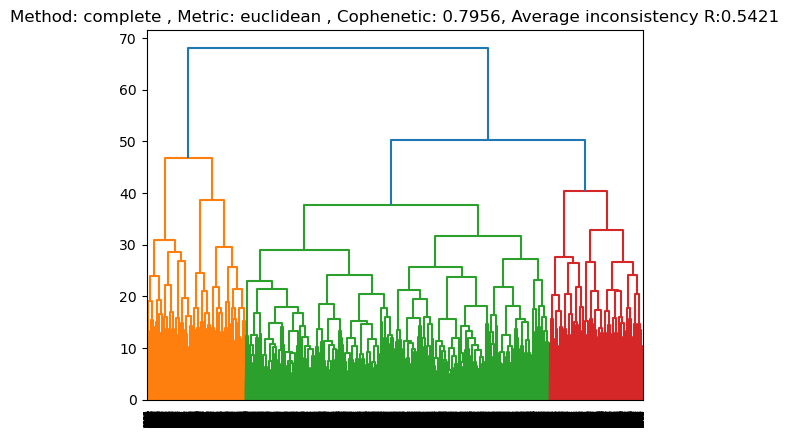

In [25]:
best_linkage = linkage(data_finish, method ='complete', metric='euclidean')

coph_dists = cophenet(best_linkage,pdist(data_finish, metric = 'euclidean'))
c = round(coph_dists[0] , 4)

inc = inconsistent(best_linkage)[:,3]
a = round(inc.mean(), 4)

plt.figure()         
dendrogram(best_linkage)
plt.title('Method: complete , Metric: euclidean , Cophenetic: ' + str(c) + ', Average inconsistency R:' + str(a))

plt.show()

In [26]:
coph_dists = cophenet(best_linkage,pdist(data_finish, metric = 'euclidean'))
c = coph_dists[0]
print(c)

0.795612938810949


In [30]:
from scipy.cluster.hierarchy import inconsistent
inc = inconsistent(best_linkage)[:,3]
a = inc.mean()
a

0.5421428562580817

## Recherche de nombre optimal de cluster

on extrait les distances entre chaque cluster 

### Nombre optimal est la plus grande des distances

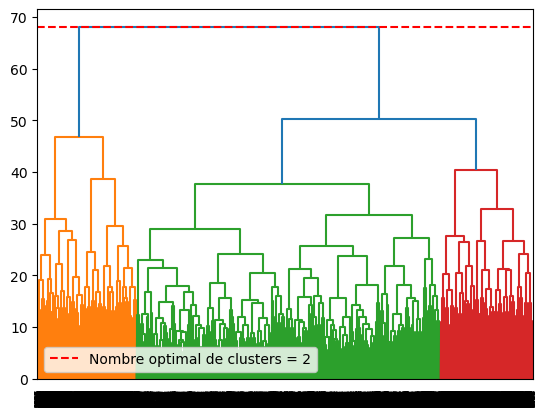

In [31]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from scipy.cluster.hierarchy import fcluster



# Essaye différentes valeurs de k (nombre de clusters) et calculez le score de silhouette pour chaque k
scores = []
k_values = []
for k in range(2, 11):  # Essayez différentes valeurs de k de 2 à 10 (ou plus)
    clustering = AgglomerativeClustering(n_clusters=k)
    labels1 = clustering.fit_predict(data_finish)
    avg = davies_bouldin_score(data_finish, labels1)
    scores.append(avg)
    k_values.append(k)

# Trouve le nombre optimal de clusters en fonction du score de silhouette
optimal_k = k_values[np.argmin(scores)]

# fait le clustering hierarchique avec le nombre optimal de clusters
clustering = AgglomerativeClustering(n_clusters=optimal_k)
labels1 = clustering.fit_predict(data_finish)


best_linkage = linkage(data_finish, method='complete', metric ='euclidean')  
dendrogram(best_linkage)

plt.axhline(y=best_linkage[-optimal_k+1, 2], c='r', linestyle='--', label=f'Nombre optimal de clusters = {optimal_k}')

plt.legend()

plt.show()

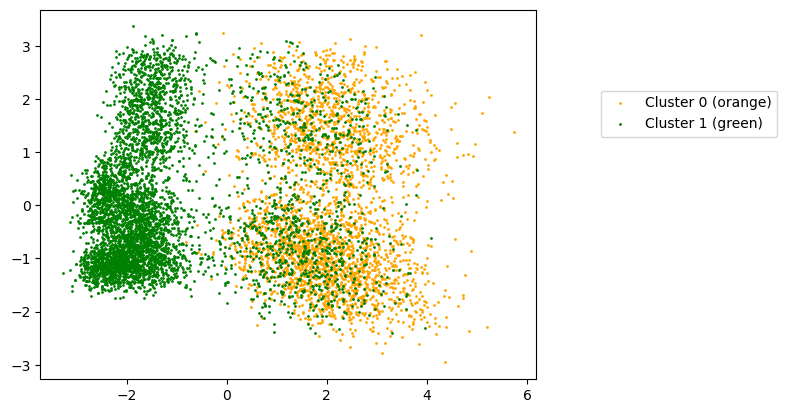

In [32]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)  
data_reduced = pca.fit_transform(data_standard) 

# Associe chaque étiquette de cluster à une couleur
cluster_colors = {
    0: 'orange',
    1: 'green'
}


cluster_legend = {f'Cluster {i}': color for i, color in cluster_colors.items()}


for cluster_label in set(labels1):
    cluster_mask = (labels1 == cluster_label)
    plt.scatter(data_reduced[cluster_mask, 0], data_reduced[cluster_mask, 1], c=cluster_colors[cluster_label], label=f'Cluster {cluster_label}', s=1)


legend_labels = [f'{key} ({value})' for key, value in cluster_legend.items()]
leg = plt.legend(legend_labels,fontsize=10)
leg.set_bbox_to_anchor((1.5, 0.8))

plt.show()

## On choisit maintenant 3 clusters

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


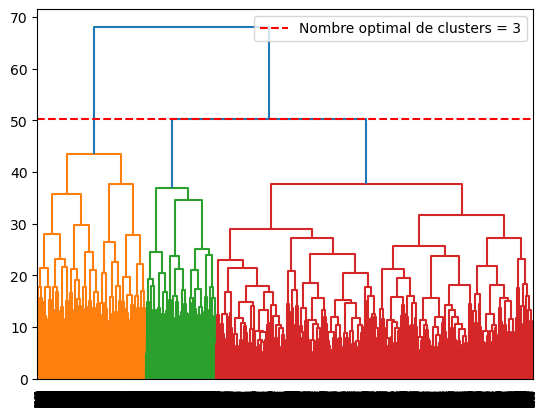

In [34]:
scores = []
k_values = []
for k in range(2, 11): 
    clustering = AgglomerativeClustering(n_clusters=k)
    labels2 = clustering.fit_predict(data_finish)
    avg = davies_bouldin_score(data_finish, labels2)
    scores.append(avg)
    k_values.append(k)

optimal_k = k_values[1]

clustering = AgglomerativeClustering(n_clusters=optimal_k,affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='complete', distance_threshold=None, compute_distances=False)
labels2 = clustering.fit_predict(data_finish)


best_linkage = linkage(data_finish, method='complete', metric ='euclidean')  
dendrogram(best_linkage)

plt.axhline(y=best_linkage[-optimal_k+1, 2], c='r', linestyle='--', label=f'Nombre optimal de clusters = {optimal_k}')

plt.legend()

plt.show()

In [35]:
scores

[0.8178273630506429,
 1.123215439136598,
 1.1699798092052969,
 1.2553498621213066,
 1.2902489285047614,
 1.430315726004947,
 1.445399790859271,
 1.4529755701469602,
 1.4488988589084664]

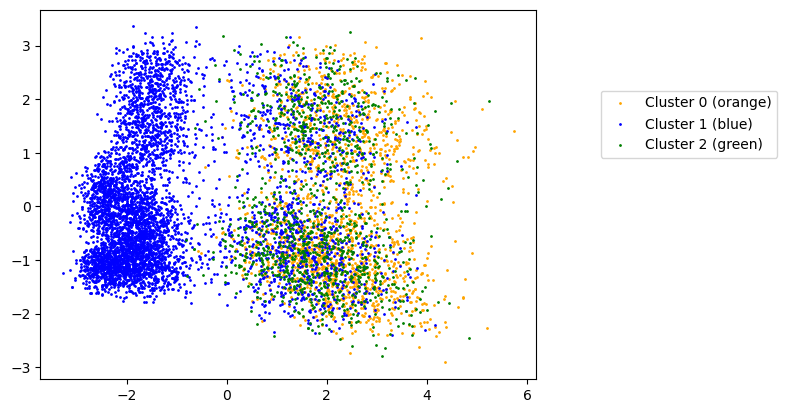

In [36]:
pca = PCA(n_components=2)  
data_reduced = pca.fit_transform(data_standard) 


cluster_colors = {
    0: 'orange',
    1: 'blue',
    2: 'green'
}


cluster_legend = {f'Cluster {i}': color for i, color in cluster_colors.items()}


for cluster_label in set(labels2):
    cluster_mask = (labels2 == cluster_label)
    plt.scatter(data_reduced[cluster_mask, 0], data_reduced[cluster_mask, 1], c=cluster_colors[cluster_label], label=f'Cluster {cluster_label}', s=1)

legend_labels = [f'{key} ({value})' for key, value in cluster_legend.items()]
leg = plt.legend(legend_labels,fontsize=10)
leg.set_bbox_to_anchor((1.5, 0.8))

plt.show()

In [37]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[4.12196586 1.67803722]
[0.20607252 0.08389137]


In [38]:
data_reduced

array([[ 2.16775602, -1.35639804],
       [ 2.97086211,  1.26220804],
       [ 2.08352944, -1.41516377],
       ...,
       [-2.01007998, -1.24747823],
       [-2.39102267, -1.12984079],
       [-2.03970351, -1.24160592]])

In [39]:
help(AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster._agglomerative:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, affinity='deprecated', metric=None, memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
 |  
 |  Agglomerative Clustering.
 |  
 |  Recursively merges pair of clusters of sample data; uses linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      The metric to use when calculating distance between instances in a
 |      feature array. If metric is a string or callable, it must be one of
 |      the options allowed by :func:`sklearn

### Visualisation par cluster 

C:\Users\jency\AppData\Local\Temp\ipykernel_9248\3873348073.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_finish['Cluster'] = labels1


<Figure size 1000x600 with 0 Axes>

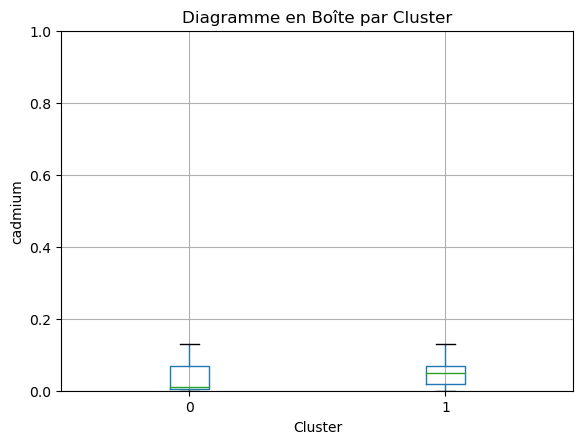

<Figure size 1000x600 with 0 Axes>

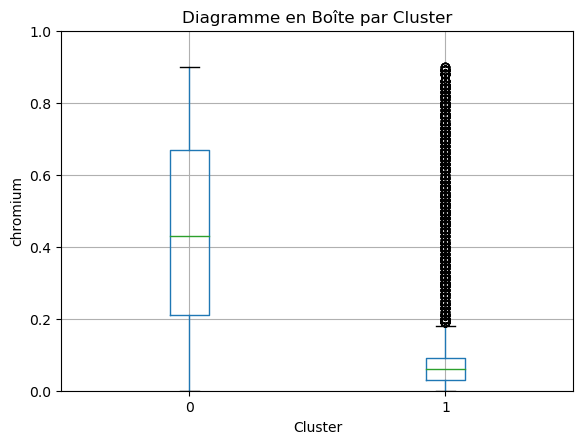

<Figure size 1000x600 with 0 Axes>

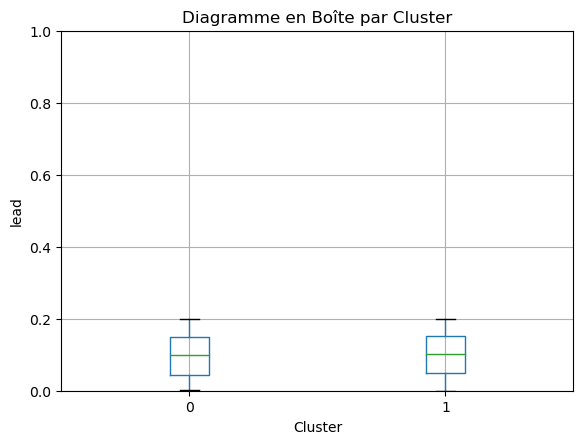

<Figure size 1000x600 with 0 Axes>

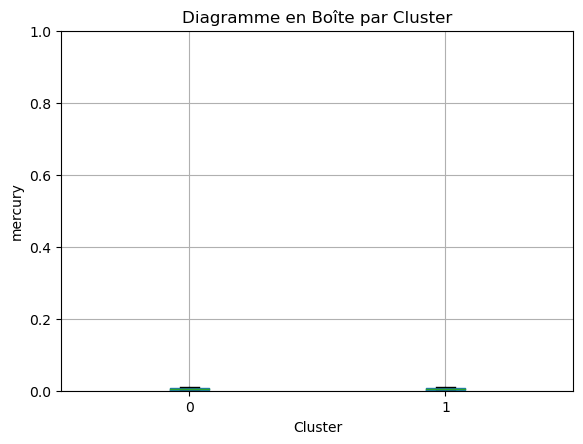

<Figure size 1000x600 with 0 Axes>

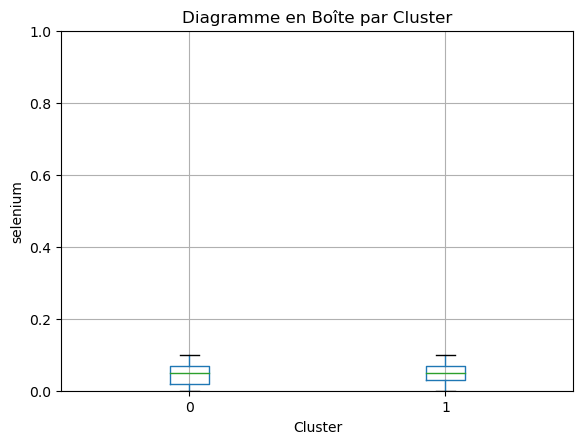

<Figure size 1000x600 with 0 Axes>

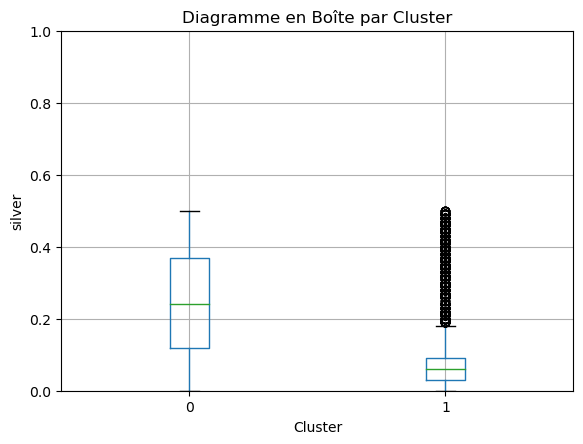

<Figure size 1000x600 with 0 Axes>

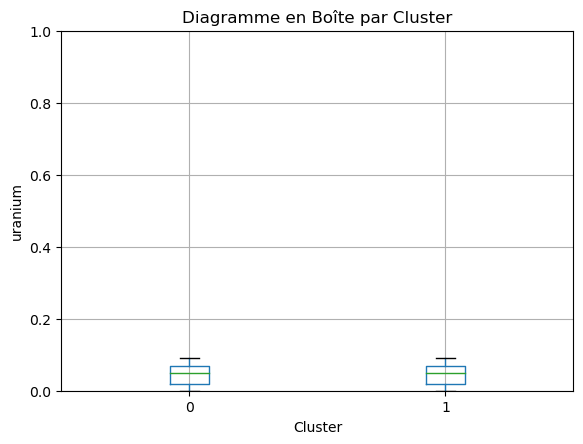

<Figure size 1000x600 with 0 Axes>

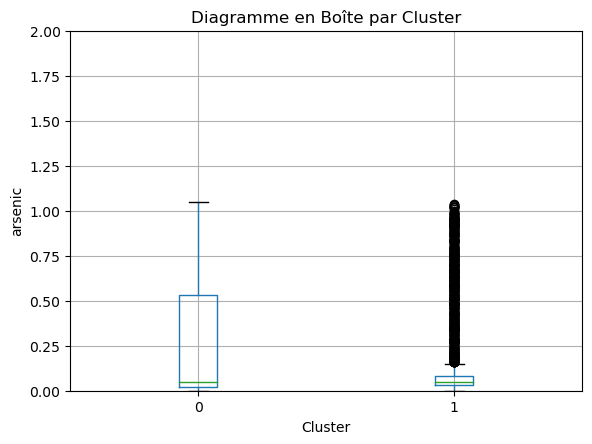

<Figure size 1000x600 with 0 Axes>

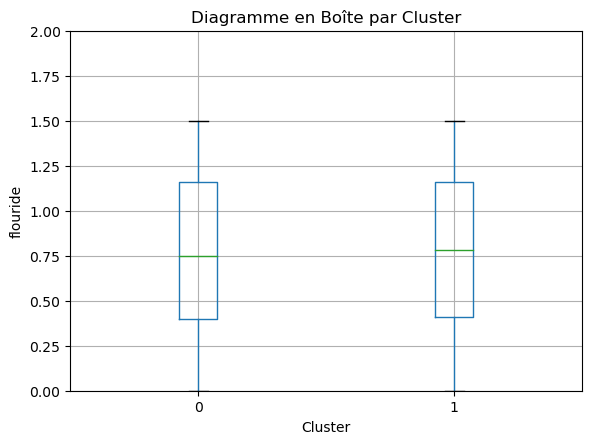

<Figure size 1000x600 with 0 Axes>

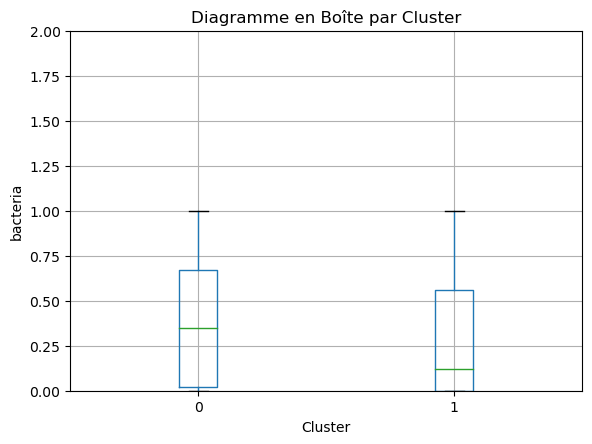

<Figure size 1000x600 with 0 Axes>

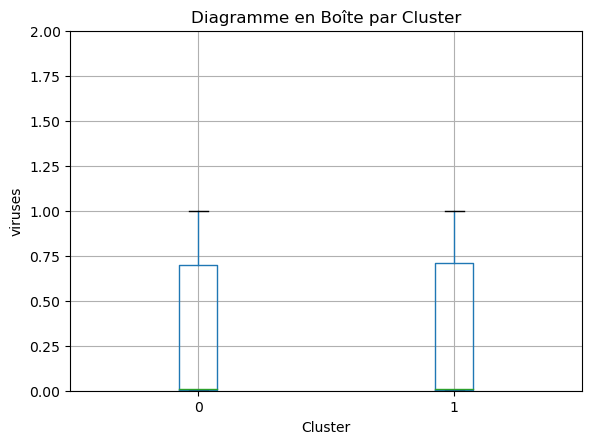

<Figure size 1000x600 with 0 Axes>

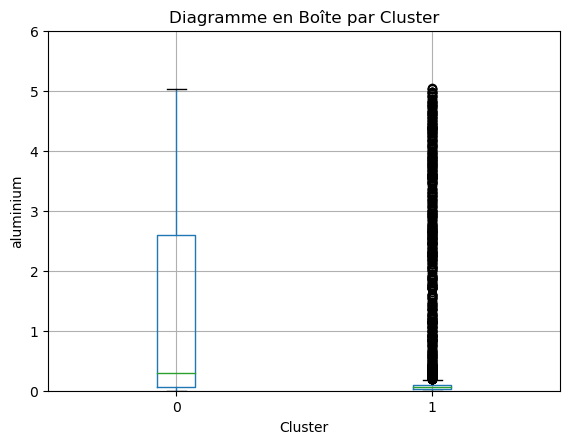

<Figure size 1000x600 with 0 Axes>

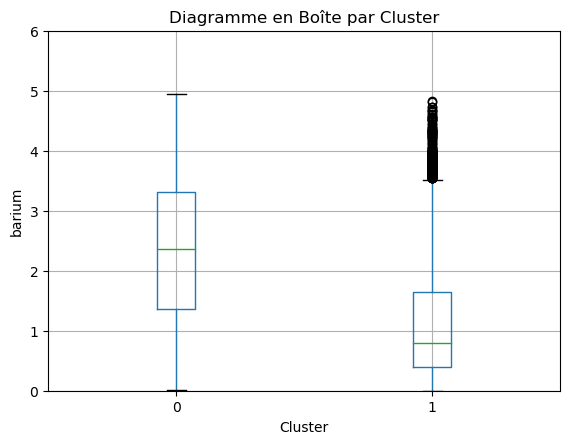

<Figure size 1000x600 with 0 Axes>

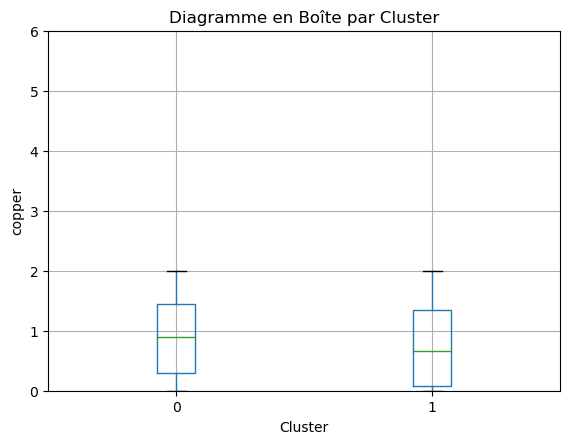

<Figure size 1000x600 with 0 Axes>

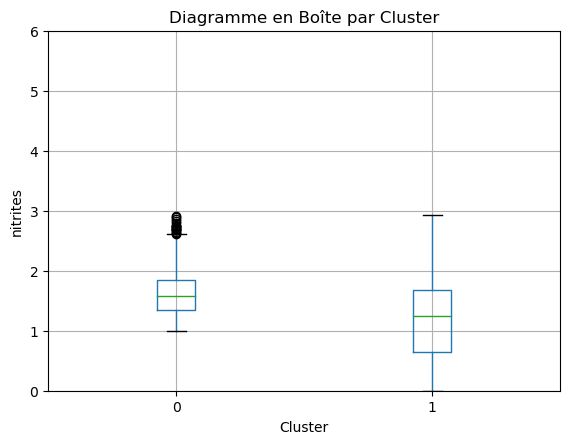

<Figure size 1000x600 with 0 Axes>

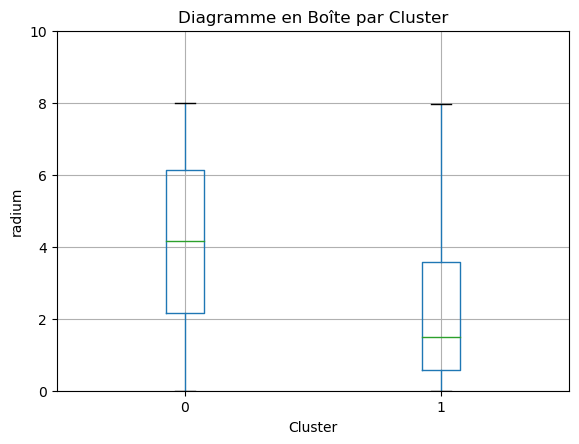

<Figure size 1000x600 with 0 Axes>

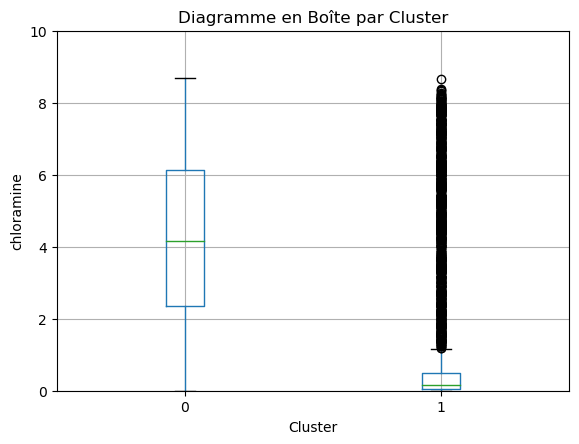

<Figure size 1000x600 with 0 Axes>

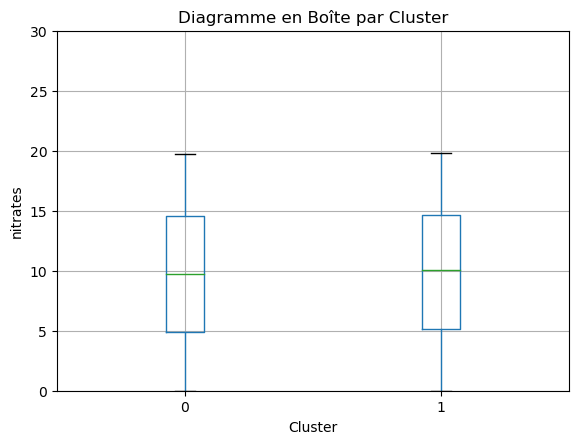

<Figure size 1000x600 with 0 Axes>

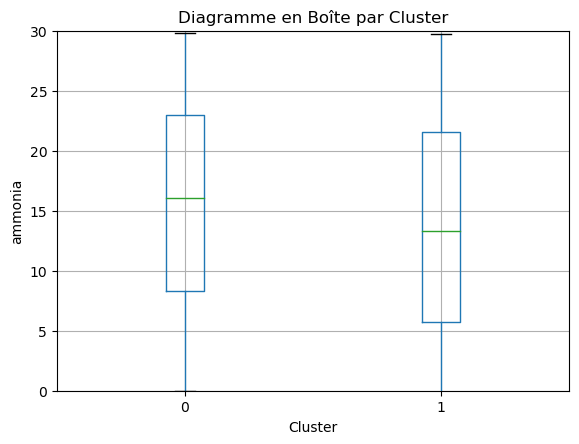

<Figure size 1000x600 with 0 Axes>

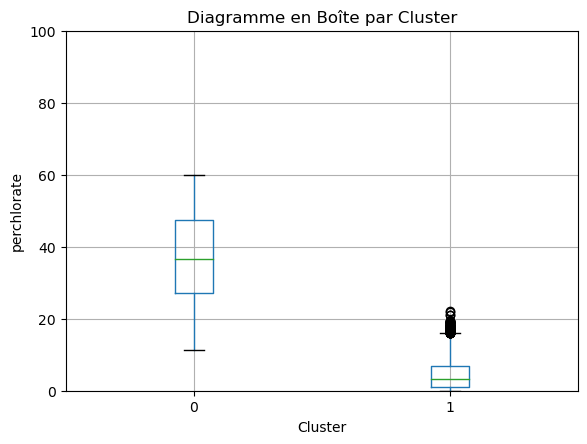

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ajoutez les étiquettes de cluster au DataFrame data_cluster
data_finish['Cluster'] = labels1

# Créez un diagramme en boîte pour chaque cluster
for i in ['cadmium','chromium', 'lead', 'mercury', 'selenium','silver', 'uranium'] :
    plt.figure(figsize=(10, 6))
    data_finish.boxplot(column= [i] , by='Cluster', grid=True)
    plt.title('Diagramme en Boîte par Cluster')
    plt.ylabel(i)
    plt.ylim(0,1)
    plt.suptitle('')

plt.show()

for i in ['arsenic', 'flouride', 'bacteria', 'viruses'] :
    plt.figure(figsize=(10, 6))
    data_finish.boxplot(column= [i] , by='Cluster', grid=True)
    plt.title('Diagramme en Boîte par Cluster')
    plt.ylabel(i)
    plt.ylim(0,2)
    plt.suptitle('') 

plt.show()

for i in ['aluminium','barium','copper', 'nitrites',] :
    plt.figure(figsize=(10, 6))
    data_finish.boxplot(column= [i] , by='Cluster', grid=True)
    plt.title('Diagramme en Boîte par Cluster')
    plt.ylabel(i)
    plt.ylim(0,6)
    plt.suptitle('')  # Supprime le titre automatique généré par pandas

plt.show()

for i in ['radium','chloramine'] :
    plt.figure(figsize=(10, 6))
    data_finish.boxplot(column= [i] , by='Cluster', grid=True)
    plt.title('Diagramme en Boîte par Cluster')
    plt.ylabel(i)
    plt.ylim(0,10)
    plt.suptitle('')  # Supprime le titre automatique généré par pandas

plt.show()

for i in ['nitrates','ammonia'] :
    plt.figure(figsize=(10, 6))
    data_finish.boxplot(column= [i] , by='Cluster', grid=True)
    plt.title('Diagramme en Boîte par Cluster')
    plt.ylabel(i)
    plt.ylim(0,30)
    plt.suptitle('')  # Supprime le titre automatique généré par pandas

plt.show()


for i in ['perchlorate'] :
    plt.figure(figsize=(10, 6))
    data_finish.boxplot(column= [i] , by='Cluster', grid=True)
    plt.title('Diagramme en Boîte par Cluster')
    plt.ylabel(i)
    plt.ylim(0,100)
    plt.suptitle('')  # Supprime le titre automatique généré par pandas

plt.show()


In [66]:
data_finish['Cluster'] = labels1

C:\Users\maserati\AppData\Local\Temp\ipykernel_5892\1909904705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_finish['Cluster'] = labels1


In [68]:
moyennes_par_cluster = data_finish.groupby('Cluster')[['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium']].mean()
print(moyennes_par_cluster)


         aluminium    ammonia   arsenic    barium   cadmium  chloramine  \
Cluster                                                                   
0         1.298053  15.437110  0.274546  2.329295  0.035537    4.168724   
1         0.302442  13.610469  0.096328  1.129237  0.046990    1.030321   

         chromium    copper  flouride  bacteria   viruses      lead  nitrates  \
Cluster                                                                         
0        0.440462  0.904116  0.766090  0.381433  0.323842  0.097147  9.698050   
1        0.136002  0.749373  0.774847  0.284151  0.331509  0.100747  9.889083   

         nitrites   mercury  perchlorate    radium  selenium    silver  \
Cluster                                                                  
0        1.600301  0.005204    37.146784  4.094841  0.050024  0.245378   
1        1.174013  0.005186     4.548831  2.243239  0.049487  0.091595   

          uranium  
Cluster            
0        0.044865  
1        0.044561

In [69]:
moyen_cluster = pd.DataFrame(moyennes_par_cluster)
moyen_cluster

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
Cluster,,,,,,,,,,,,,,,,,,,,
0,1.298053,15.437110,0.274546,2.329295,0.035537,4.168724,0.440462,0.904116,0.766090,0.381433,0.323842,0.097147,9.698050,1.600301,0.005204,37.146784,4.094841,0.050024,0.245378,0.044865
1,0.302442,13.610469,0.096328,1.129237,0.046990,1.030321,0.136002,0.749373,0.774847,0.284151,0.331509,0.100747,9.889083,1.174013,0.005186,4.548831,2.243239,0.049487,0.091595,0.044561


In [70]:
data_finish['num'] = range(len(data_finish))
data['num'] =range(len(data))


C:\Users\maserati\AppData\Local\Temp\ipykernel_5892\2670159960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_finish['num'] = range(len(data_finish))


In [71]:
data_finish

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,Cluster,num
0,1.65,9.080000,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,0,0
1,2.32,21.160000,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,0,1
2,1.01,14.020000,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0,2
3,1.36,11.330000,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1,3
4,0.92,24.330000,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.780000,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1,7991
7995,0.05,24.219999,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1,7992
7996,0.09,6.850000,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1,7993
7997,0.01,10.000000,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1,7994


In [73]:
data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe,num
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1,0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0,2
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1,3
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1,7994
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1,7995
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1,7996
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1,7997


In [74]:
data_merge = data_finish.merge(data[['num','is_safe']], on='num')
data_merge

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,Cluster,num,is_safe
0,1.65,9.080000,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,1.13,0.007,37.75,6.78,0.08,0.34,0.02,0,0,1
1,2.32,21.160000,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,1.93,0.003,32.26,3.21,0.08,0.27,0.05,0,1,1
2,1.01,14.020000,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0,2,0
3,1.36,11.330000,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1,3,1
4,0.92,24.330000,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,0.05,7.780000,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1,7991,1
7992,0.05,24.219999,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1,7992,1
7993,0.09,6.850000,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1,7993,1
7994,0.01,10.000000,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1,7994,1


In [75]:
# Calcule le nombre d'observations "safe" par cluster
cluster_safe_counts = data_merge.groupby('Cluster')['is_safe'].sum().reset_index()

# Trie les clusters en fonction du nombre d'observations "safe"
cluster_safe_counts = cluster_safe_counts.sort_values(by='is_safe', ascending=False)

# Créez un dictionnaire de classement
cluster_ranking = {cluster: rank for rank, cluster in enumerate(cluster_safe_counts['Cluster'], 1)}

# Ajoutez une nouvelle colonne "class_Cluster"
data_merge['class_Cluster'] = data_merge['Cluster'].map(cluster_ranking)

# Créez un nouveau DataFrame pour stocker les résultats
data_class = data_merge[['Cluster', 'is_safe', 'class_Cluster']].copy()

data_class


,Cluster,is_safe,class_Cluster
0,0,1,2
1,0,1,2
2,0,0,2
3,1,1,1
4,1,1,1
...,...,...,...
7991,1,1,1
7992,1,1,1
7993,1,1,1
7994,1,1,1


In [76]:
data_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Cluster        7996 non-null   int64 
 1   is_safe        7996 non-null   object
 2   class_Cluster  7996 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 187.5+ KB


In [77]:
from collections import Counter

labels = list(data_class['Cluster'])

# Compter le nombre d'occurrences de chaque label de cluster
cluster_counts = Counter(labels)

# Afficher le nombre d'observations dans chaque cluster
print("Nombre d'observations dans chaque cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} observations")


Nombre d'observations dans chaque cluster:
Cluster 0: 2923 observations
Cluster 1: 5073 observations


In [78]:
# Filtrer les données pour le cluster 1 et les observations sécurisées (is_safe = 1)
cluster_1_safe_count = len(data_class[(data_class['Cluster'] == 1) & (data_class['is_safe'] == '1')])

print("Nombre d'observations sécurisées dans le cluster 1 :", cluster_1_safe_count)


Nombre d'observations sécurisées dans le cluster 1 : 417


In [79]:
count_ones = data_class['is_safe'].value_counts().get(1, 0)
print("Nombre total d'observations sécurisées : "  + str(count_ones))


Nombre total d'observations sécurisées : 909
